In [10]:
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #untuk standarisasi
from sklearn.preprocessing import LabelEncoder # untuk label encoding
import sklearn # untuk data splitting
from sklearn.model_selection import train_test_split # untuk data splitting

In [12]:
df = pd.read_csv("../data/dirty_cafe_sales.csv")

In [13]:
df.head()  # menampilkan 5 baris pertama

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [14]:
df.shape  # (jumlah_baris, jumlah_kolom)

(10000, 8)

In [15]:
df.describe(include="all")  # ringkasan statistik

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


# Mengatasi Missing Value

In [16]:
# Cek data jumlah data hilang
missing_value = df.isnull().sum()
missing_value[missing_value > 0] # cek data array missing value yang lebih dari 0

Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [17]:
# Pertama-tama, mari kita pisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%.
less = missing_value[missing_value < 1000].index # indexnya diambil dengan .index
more = missing_value[missing_value >= 1000].index

In [18]:
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent',
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:
# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = df[less].select_dtypes(include=["number"]).columns # Mengambil kolom yang bertipe numeric
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median()) # mengisi kolom numeric dengan median dari kolom numeric
print(numeric_features)
# print(less)
# print(df[less].dtypes)

# Baris pertama memilih nama-nama kolom dari DataFrame df yang memiliki tipe data numerik dari subset kolom yang ditentukan oleh less.

# Baris kedua kemudian mengisi semua nilai yang hilang (NaN) pada kolom-kolom numerik tersebut dengan nilai median dari masing-masing kolom.

Index(['Quantity', 'Price Per Unit', 'Total Spent'], dtype='object')


## Mengisi Missing Value Pada String

In [20]:
# Contoh mengisi nilai yang hilang dengan mode/modulus untuk kolom kategori 
kategorical_features = df[less].select_dtypes(include=['object']).columns # Mengambil missing value pada kolom bertipe object
print(kategorical_features)

for collum in kategorical_features:
    df[collum] = df[collum].fillna(df[collum].mode()[0]) # ambil index pertama dari modulus .mode()[0]

Index(['Transaction ID', 'Item', 'Transaction Date'], dtype='object')


In [21]:
# Menghapus kolom dengan banyak data missing
# gunakan variable baru agar dapat dibandingkan dengan data yang lama
new_df = df.drop(columns=more)

In [22]:
missing_value = new_df.isnull().sum()
missing_value[missing_value > 0]

Series([], dtype: int64)

# Mengatasi Outliers

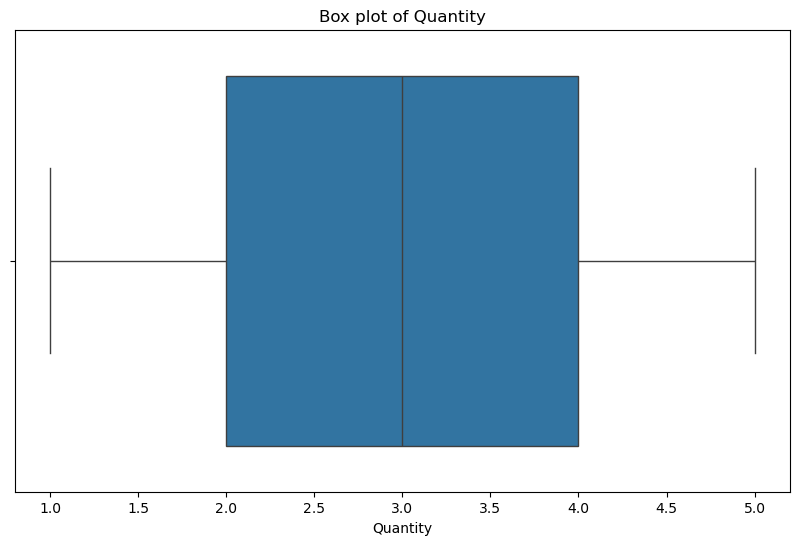

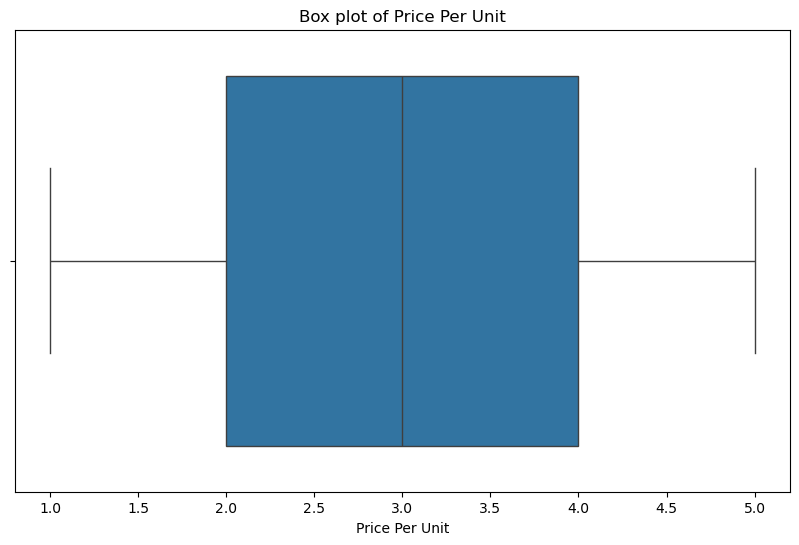

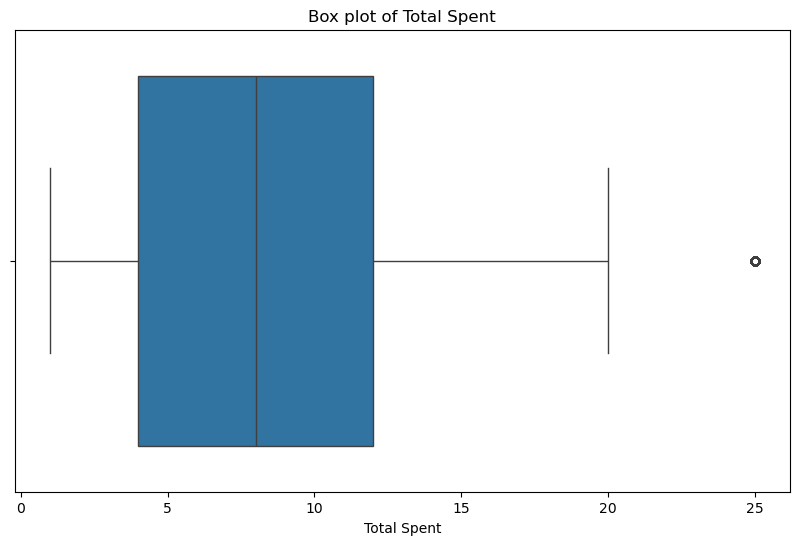

In [23]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=new_df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [24]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = new_df[numeric_features].quantile(0.25)
Q3 = new_df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity          2.0
Price Per Unit    2.0
Total Spent       8.0
dtype: float64


In [25]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((new_df[numeric_features] < (Q1 - 1.5 * IQR)) | (new_df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = new_df.loc[condition, numeric_features]

In [26]:
# Menggabungkan kembali dengan kolom kategorikal
categorical_features = new_df.select_dtypes(include=['object']).columns
new_df = pd.concat([df_filtered_numeric, new_df.loc[condition, categorical_features]], axis=1)

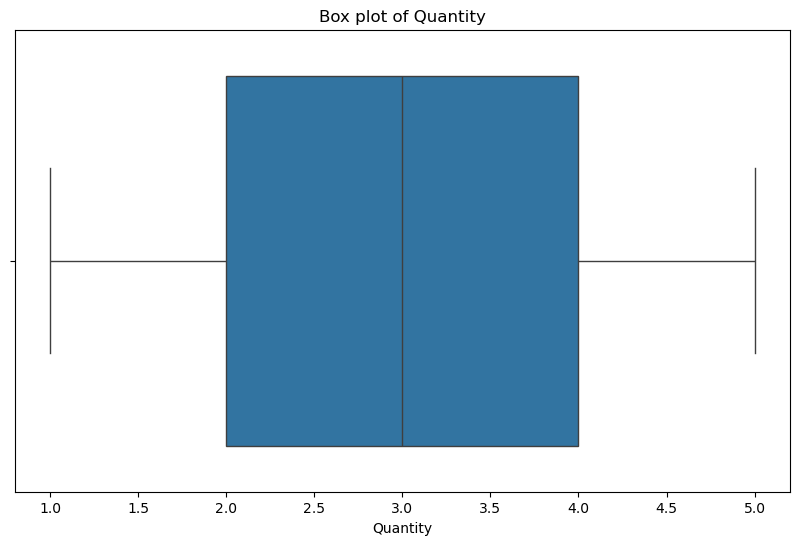

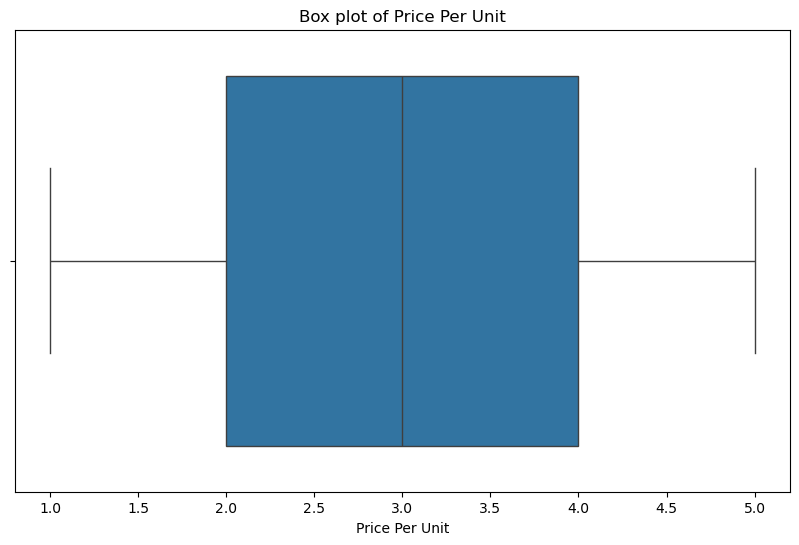

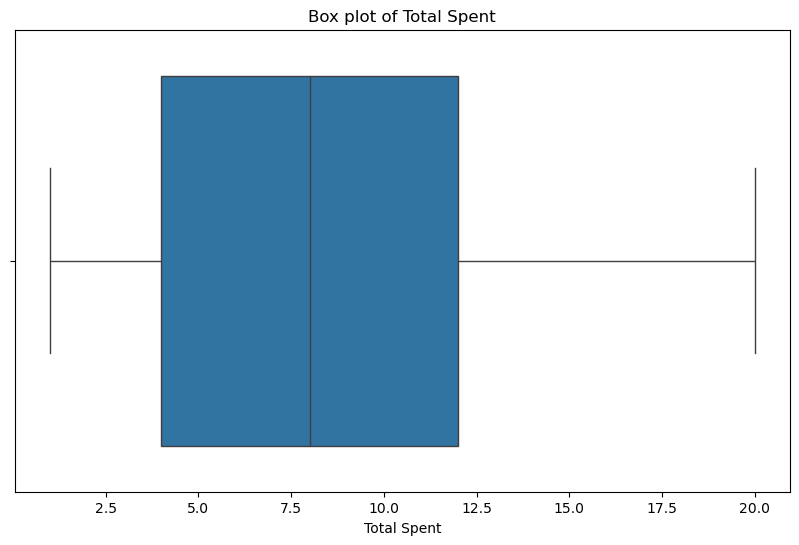

In [27]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=new_df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

# Normalisasi dan Standardisasi Data

In [28]:
# Standardisasi fitur numerik
scaler = StandardScaler()
new_df[numeric_features] = scaler.fit_transform(new_df[numeric_features])

In [29]:
numeric_features

Index(['Quantity', 'Price Per Unit', 'Total Spent'], dtype='object')

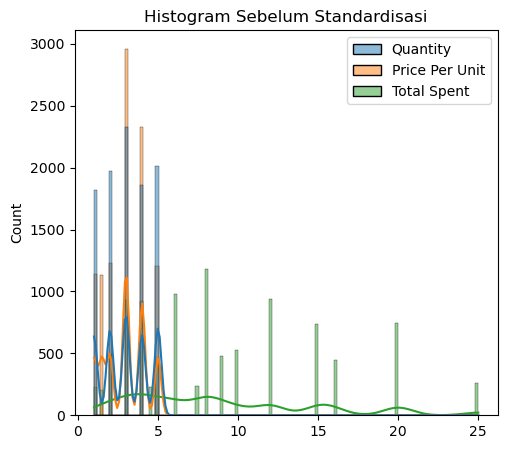

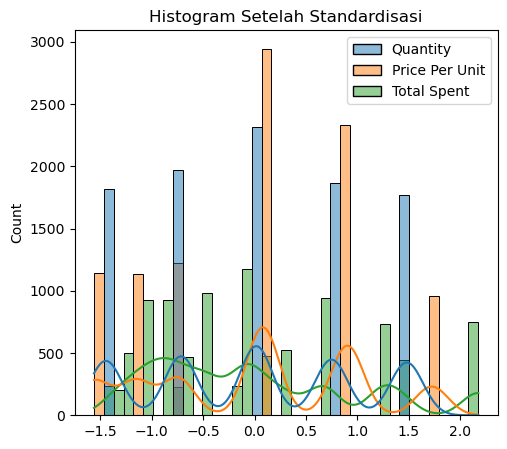

In [30]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_features], kde=True)
plt.title("Histogram Sebelum Standardisasi")
plt.show()

# Histogram Sesudah Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(new_df[numeric_features], kde=True)
plt.title("Histogram Setelah Standardisasi")
plt.show()

# Menangani Duplikasi Data

In [31]:
# Mengidentifikasi baris duplikat
duplicates = new_df.duplicated()
 
print("Baris duplikat:")
print(new_df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Quantity, Price Per Unit, Total Spent, Transaction ID, Item, Transaction Date]
Index: []


In [32]:
# Menghapus baris duplikat
new_df = new_df.drop_duplicates()
 
print("DataFrame setelah menghapus duplikat:")
print(new_df)

DataFrame setelah menghapus duplikat:
      Quantity  Price Per Unit  Total Spent Transaction ID      Item  \
0    -0.715225       -0.740718    -0.838421    TXN_1961373    Coffee   
1     0.748432        0.080934     0.669095    TXN_4977031      Cake   
2     0.748432       -1.562369    -0.084663    TXN_4271903    Cookie   
3    -0.715225        1.724236     0.292216    TXN_7034554     Salad   
4    -0.715225       -0.740718    -0.838421    TXN_3160411    Coffee   
...        ...             ...          ...            ...       ...   
9995 -0.715225       -0.740718    -0.838421    TXN_7672686    Coffee   
9996  0.016603        0.080934    -1.026861    TXN_9659401     Juice   
9997  0.748432       -0.740718    -0.084663    TXN_5255387    Coffee   
9998  0.016603        0.080934    -1.026861    TXN_7695629    Cookie   
9999  0.016603        0.902585     0.669095    TXN_6170729  Sandwich   

     Transaction Date  
0          2023-09-08  
1          2023-05-16  
2          2023-07-19  
3

# Mengonversi Tipe Data

In [33]:
# Seleksi kolom kategorikal
category_features = new_df.select_dtypes(include="object").columns
new_df[category_features]

,Transaction ID,Item,Transaction Date
0,TXN_1961373,Coffee,2023-09-08
1,TXN_4977031,Cake,2023-05-16
2,TXN_4271903,Cookie,2023-07-19
3,TXN_7034554,Salad,2023-04-27
4,TXN_3160411,Coffee,2023-06-11
...,...,...,...
9995,TXN_7672686,Coffee,2023-08-30
9996,TXN_9659401,Juice,2023-06-02
9997,TXN_5255387,Coffee,2023-03-02
9998,TXN_7695629,Cookie,2023-12-02


## One Hot Encoding

In [34]:
# One hot encoding
df_one_hot = pd.get_dummies(new_df, columns=category_features)
df_one_hot

,Quantity,Price Per Unit,Total Spent,Transaction ID_TXN_1000555,Transaction ID_TXN_1001832,Transaction ID_TXN_1002457,Transaction ID_TXN_1003246,Transaction ID_TXN_1004184,Transaction ID_TXN_1004563,Transaction ID_TXN_1005331,...,Transaction Date_2023-12-24,Transaction Date_2023-12-25,Transaction Date_2023-12-26,Transaction Date_2023-12-27,Transaction Date_2023-12-28,Transaction Date_2023-12-29,Transaction Date_2023-12-30,Transaction Date_2023-12-31,Transaction Date_ERROR,Transaction Date_UNKNOWN
0,-0.715225,-0.740718,-0.838421,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.748432,0.080934,0.669095,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.748432,-1.562369,-0.084663,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.715225,1.724236,0.292216,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.715225,-0.740718,-0.838421,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.715225,-0.740718,-0.838421,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,0.016603,0.080934,-1.026861,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,0.748432,-0.740718,-0.084663,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,0.016603,0.080934,-1.026861,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Label Encoding

In [35]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(new_df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(new_df[col])
 
# Menampilkan hasil
df_lencoder

,Quantity,Price Per Unit,Total Spent,Transaction ID,Item,Transaction Date
0,-0.715225,-0.740718,-0.838421,1026,1,250
1,0.748432,0.080934,0.669095,4347,0,135
2,0.748432,-1.562369,-0.084663,3597,2,199
3,-0.715225,1.724236,0.292216,6571,5,116
4,-0.715225,-0.740718,-0.838421,2372,1,161
...,...,...,...,...,...,...
9995,-0.715225,-0.740718,-0.838421,7244,1,241
9996,0.016603,0.080934,-1.026861,9363,4,152
9997,0.748432,-0.740718,-0.084663,4643,1,60
9998,0.016603,0.080934,-1.026861,7272,2,335


In [36]:
df_lencoder.head()

,Quantity,Price Per Unit,Total Spent,Transaction ID,Item,Transaction Date
0,-0.715225,-0.740718,-0.838421,1026,1,250
1,0.748432,0.080934,0.669095,4347,0,135
2,0.748432,-1.562369,-0.084663,3597,2,199
3,-0.715225,1.724236,0.292216,6571,5,116
4,-0.715225,-0.740718,-0.838421,2372,1,161


# EDA dan ExDA

In [37]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100
 
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)
 
missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

,Missing Values,Percentage


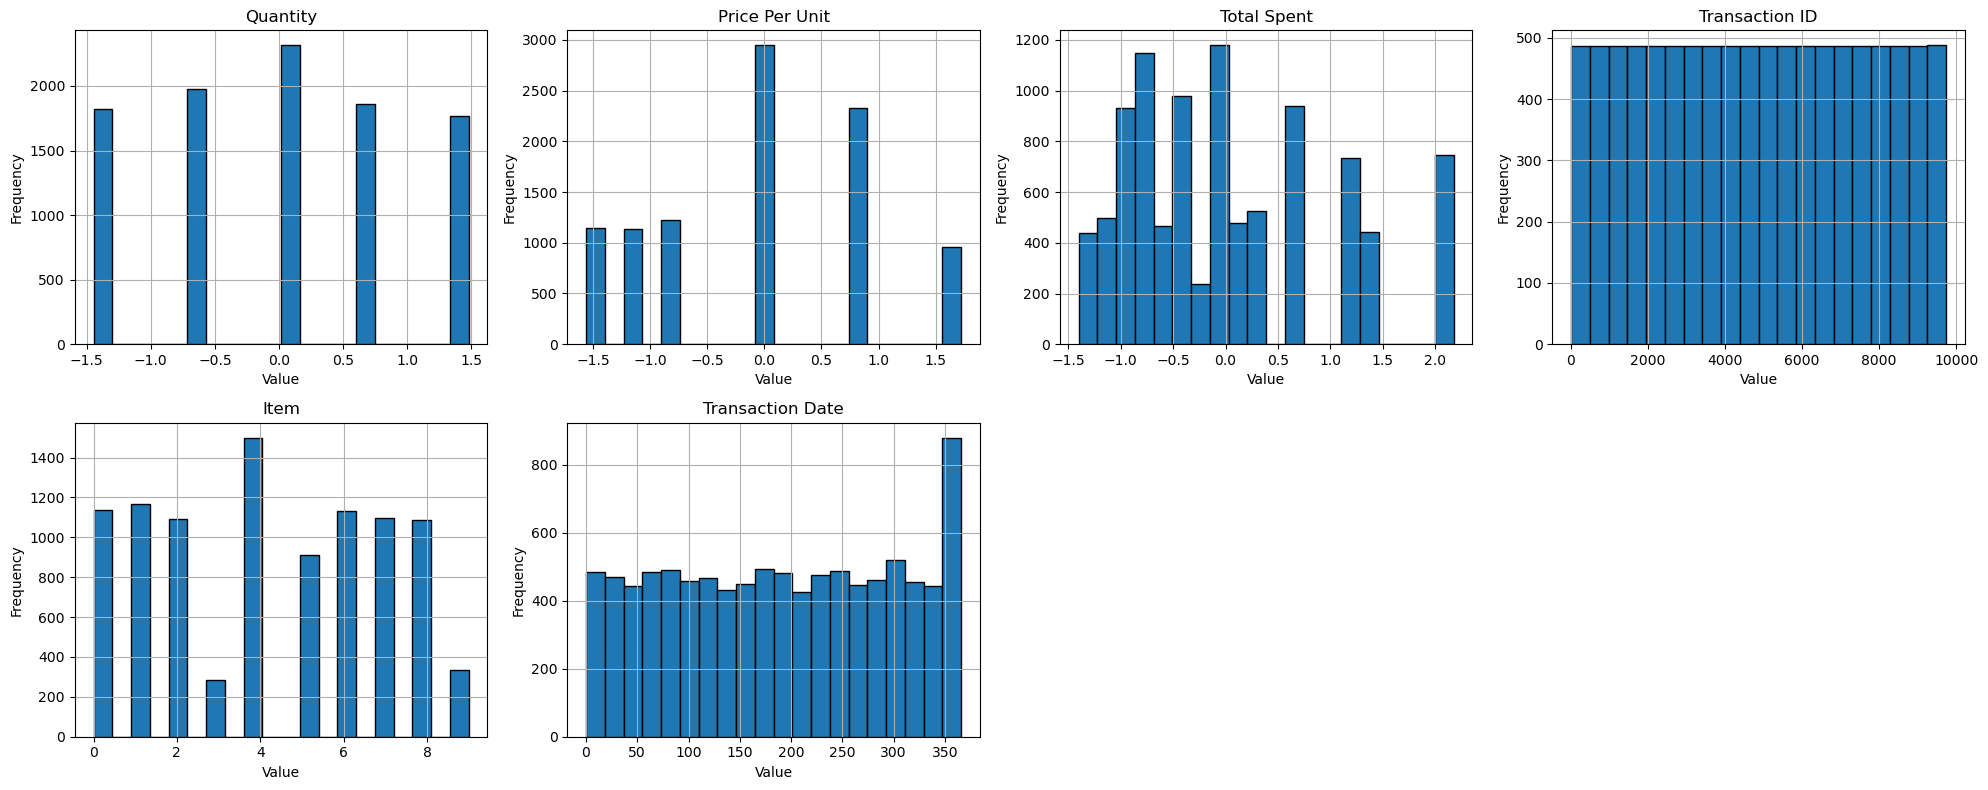

In [38]:
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

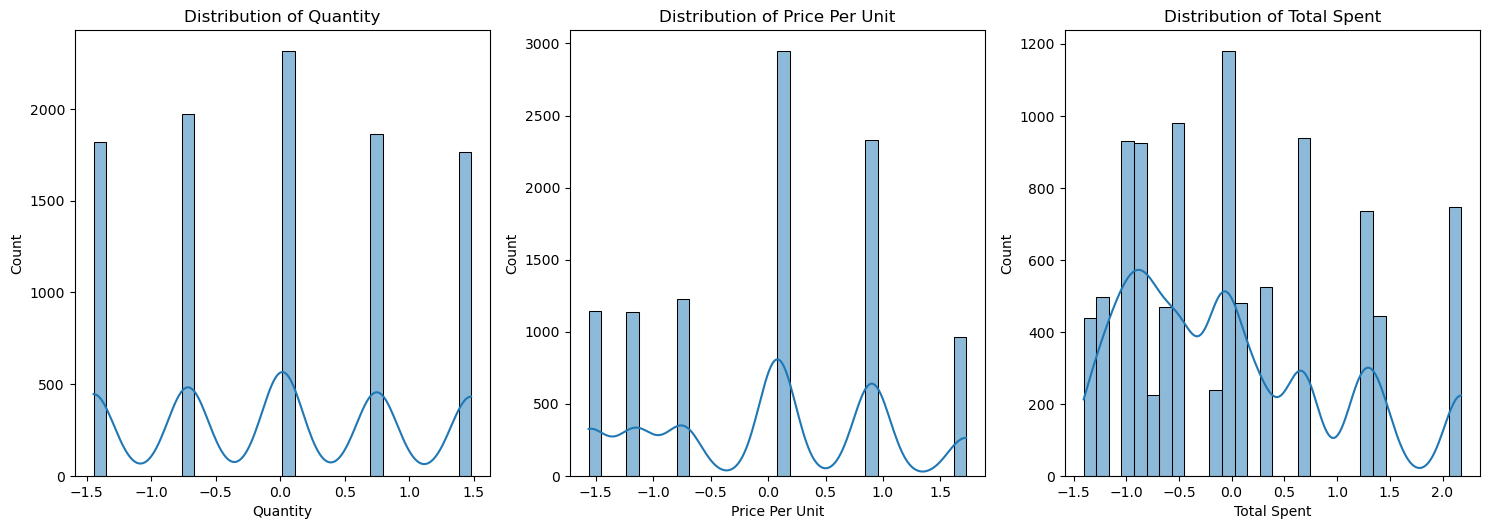

In [39]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['Quantity', 'Price Per Unit', 'Total Spent',]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

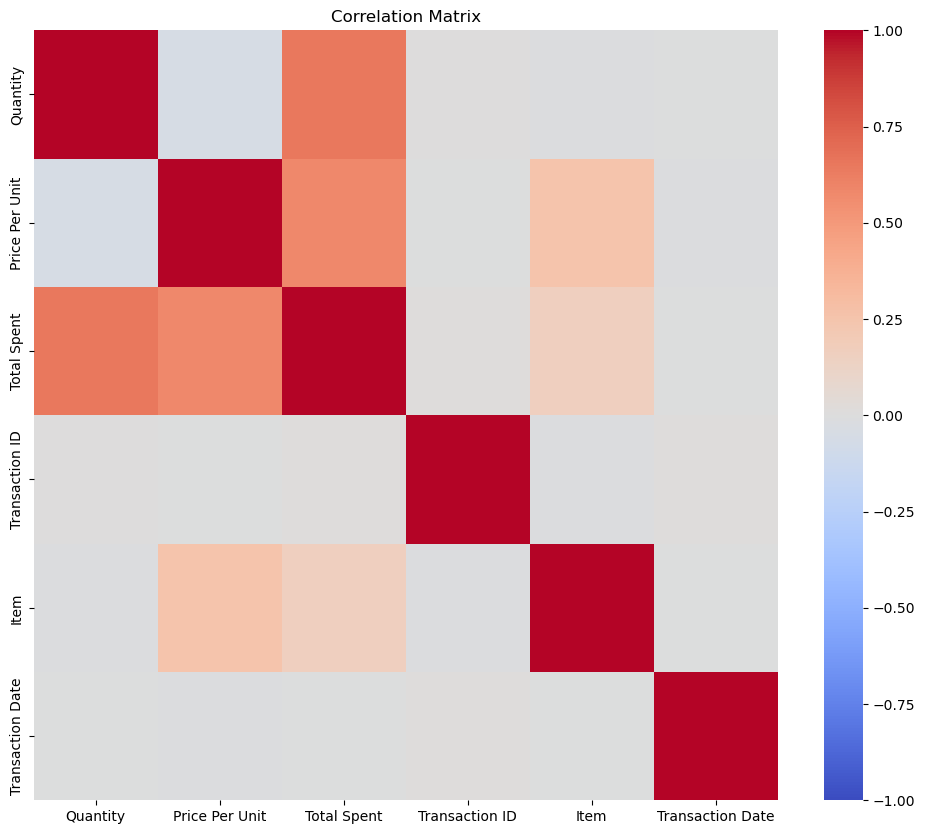

In [40]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

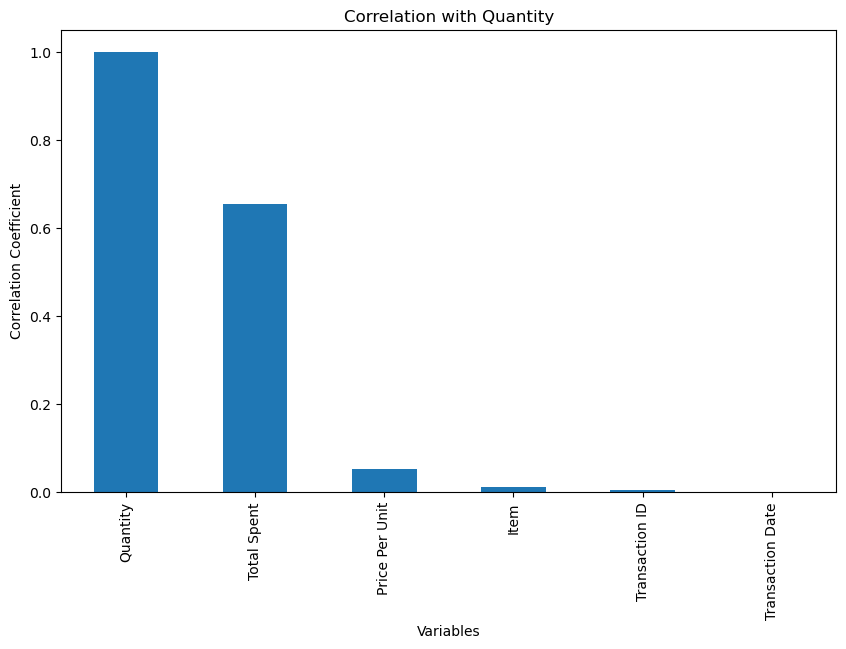

In [41]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['Quantity']
 
# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
 
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Quantity')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# Data Splitting

In [44]:
# Memisahkan fitur (x) dan target (y)
# kita akan menggunakan price per unit sebagai target yang akan di prediksi
'''
- X: kumpulan atribut atau fitur dari dataset, yaitu semua kolom kecuali kolom target (pada kasus ini Price Per Unit).

- y: target atau label yang akan kita prediksi merupakan kolom yang ingin kita pisahkan (pada kasus ini Price Per Unit).

-test_size: persentase dari data yang akan digunakan sebagai test set. Misalnya, ketika Anda menentukan test_size=0.2, 20% dari data akan menjadi test set, dan 80% sisanya akan menjadi train set.

- random_state: parameter yang memastikan pemisahan data yang konsisten setiap kali fungsi tersebut dijalankan. Parameter ini mengontrol pengacakan saat membagi dataset sehingga dengan menetapkan random_state hasil pembagian data (train set dan test set) akan selalu sama. Hal ini penting untuk memastikan eksperimen yang dapat direproduksi dan evaluasi model yang konsisten. Namun, parameter ini juga dapat memiliki kekurangan yaitu model tidak akan menerima inputan baru yang mungkin akan lebih baik dari sebelumnya.

Ketika Anda menjalankan train_test_split, fungsi ini akan mengembalikan empat bagian data seperti berikut.

X_train: fitur untuk train set.
X_test: fitur untuk test set.
y_train: target untuk train set.
y_test: target untuk test set.
'''
X = df_lencoder.drop(columns=['Price Per Unit'])
y = df_lencoder['Price Per Unit']

# membagi dataset menjadi training dan testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# menghitung panjang/jumlah data 
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_train
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  9741
Jumlah data latih:  7792
Jumlah data test:  1949
